# Homework 3

## Summary

### Iris
In this part I recreate different plots from the homework page. I also interpret these plots and analyse how th sepal and petal dimensions are distributed. I also disccus how the different variables are related to each other by looking at the pairs-plot.

### Birdwatching

In this second part i answer the following three questions

- What are the most prevelant species?
- What is the monthly distribution of the top 3 most prevelant species
- What are the rarest species?

I then generate the questions, and try to give asnwers to these by plotting different graphs.

- What does the distribution of the number of observations over time look like?
-  What does the distribution look like with only the observation times?
- What does the distribution of red-listed species look like?


### Predicting Strokes

Thirdly, I generate three questions to the stoke-data.csv data and answers these questions by plotting different graphs.

- What does the proportion of men and women being married or not look like in relation to having had a stroke or not?
- How does the distribution looks between age and married vs non married?
- Does living in an urban or rural environment have a relationship with having a stroke or not?

### Cleaning data

Lastly we were tasked with fixing and cleaning the data.

- Deal with missing values in a suitable way (fill and/or remove missing values).
- Convert all the relevant cells to numbers (not strings).



## Loading Data and Imporating Libray
Here I load all of the necceasry data and libraries I will be using for this Lab.

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

df_iris = pd.read_csv('IRIS.csv')
df_art = pd.read_csv("artportalen.csv", sep=",")
df_stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")
df_phone = pd.read_csv('cell_phones_total.csv')

## Iris

First we will recreate the plots that are shown in the homework page.

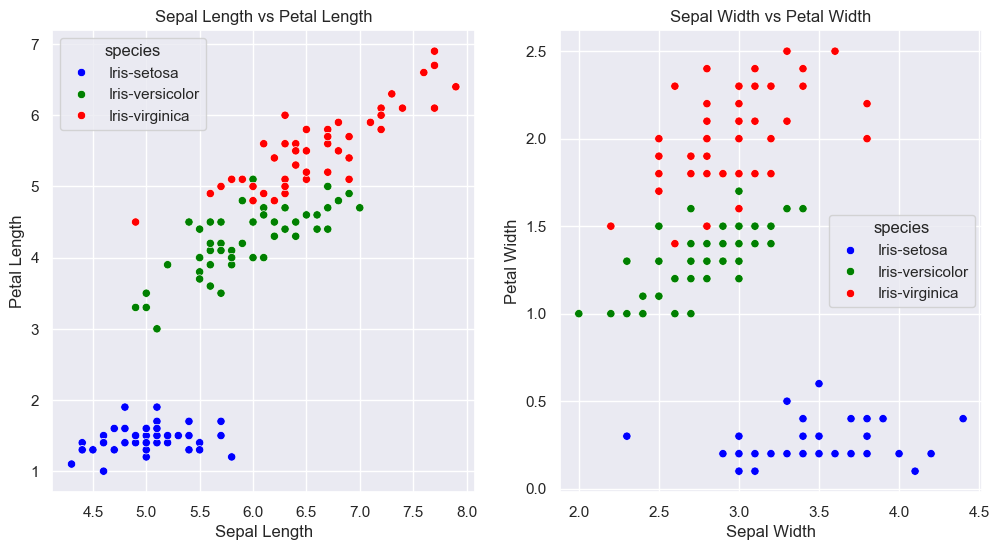

In [44]:
# visuals
sns.set_theme(style="darkgrid")
custom_palette = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}


plt.figure(figsize=(12, 6))

# sepal length vs petal length
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_iris, x="sepal_length", y="petal_length", hue="species", palette=custom_palette)
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")

# sepal width vs petal width
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_iris, x="sepal_width", y="petal_width", hue="species", palette=custom_palette)
plt.title("Sepal Width vs Petal Width")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")

plt.show()


### What can you say about the relationship given the figure?

For Iris-setosa, there seems to be no correlation between sepal length and petal length, or between sepal width and petal width. For Iris-versicolor, there appears to be a linear relationship between sepal length and petal length, as well as a somewhat weaker but still noticeable relationship between sepal width and petal width. For Iris-virginica, there is a clear linear trend between sepal length and petal length, and also between sepal width and petal width, although the last mentioned is less clear.

Text(0, 0.5, 'Petal Length')

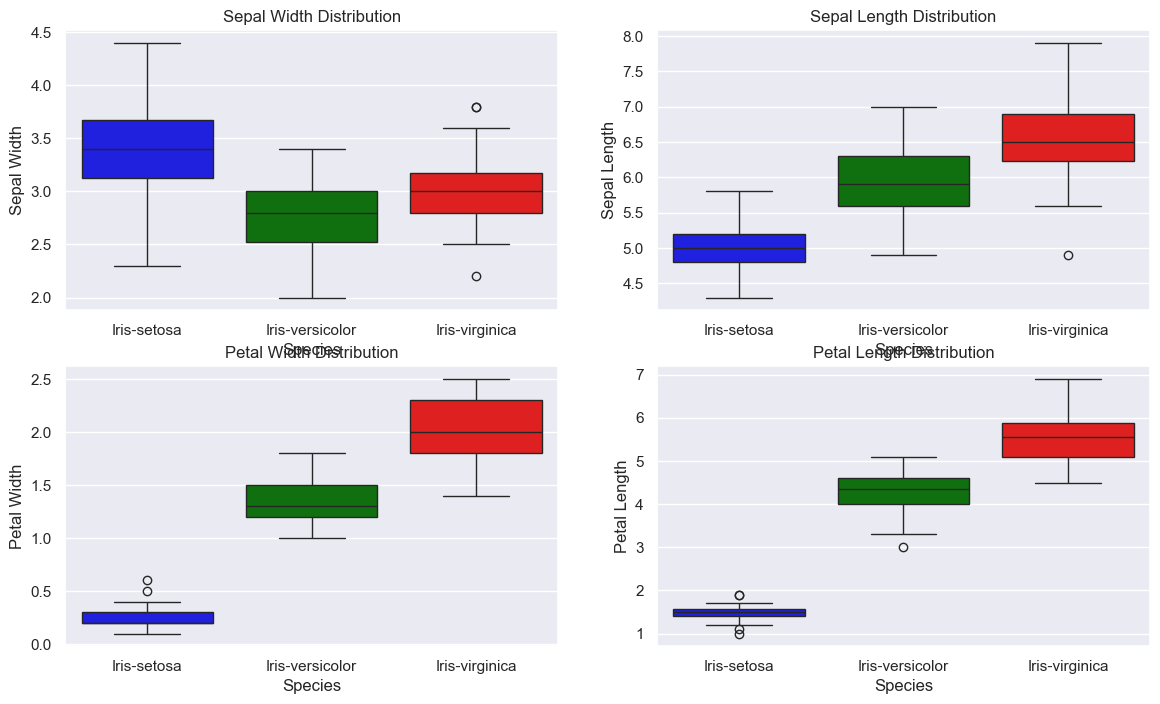

In [46]:
plt.figure(figsize=(14, 8))

# sepal Width
plt.subplot(2, 2, 1)
sns.boxplot(data=df_iris, x="species", y="sepal_width", hue="species", palette=custom_palette, dodge=False, legend=False)
plt.title("Sepal Width Distribution")
plt.xlabel("Species")
plt.ylabel("Sepal Width")

# sepal Length
plt.subplot(2, 2, 2)
sns.boxplot(data=df_iris, x="species", y="sepal_length", hue="species", palette=custom_palette, dodge=False, legend=False)
plt.title("Sepal Length Distribution")
plt.xlabel("Species")
plt.ylabel("Sepal Length")

# petal Width
plt.subplot(2, 2, 3)
sns.boxplot(data=df_iris, x="species", y="petal_width", hue="species", palette=custom_palette, dodge=False, legend=False)
plt.title("Petal Width Distribution")
plt.xlabel("Species")
plt.ylabel("Petal Width")

# petal Length
plt.subplot(2, 2, 4)
sns.boxplot(data=df_iris, x="species", y="petal_length", hue="species", palette=custom_palette, dodge=False, legend=False)
plt.title("Petal Length Distribution")
plt.xlabel("Species")
plt.ylabel("Petal Length")

### What can you conclude from this figure?

One thing we can conclude from these box plots is that for petal width, petal length, and sepal length, it is clear that Iris-setosa (blue) is the smallest, followed by Iris-versicolor (green), with Iris-virginica (red) being the largest. When it comes to sepal width, they all seem to be quite similar in size, and further analysis would be needed to determine if the small differences are just random, or if there is actually a significant difference in sepal width between the species. However, in general, we see that Iris-setosa (blue) has the largest median, followed by Iris-virginica (red), and the smallest median is for Iris-versicolor (green).

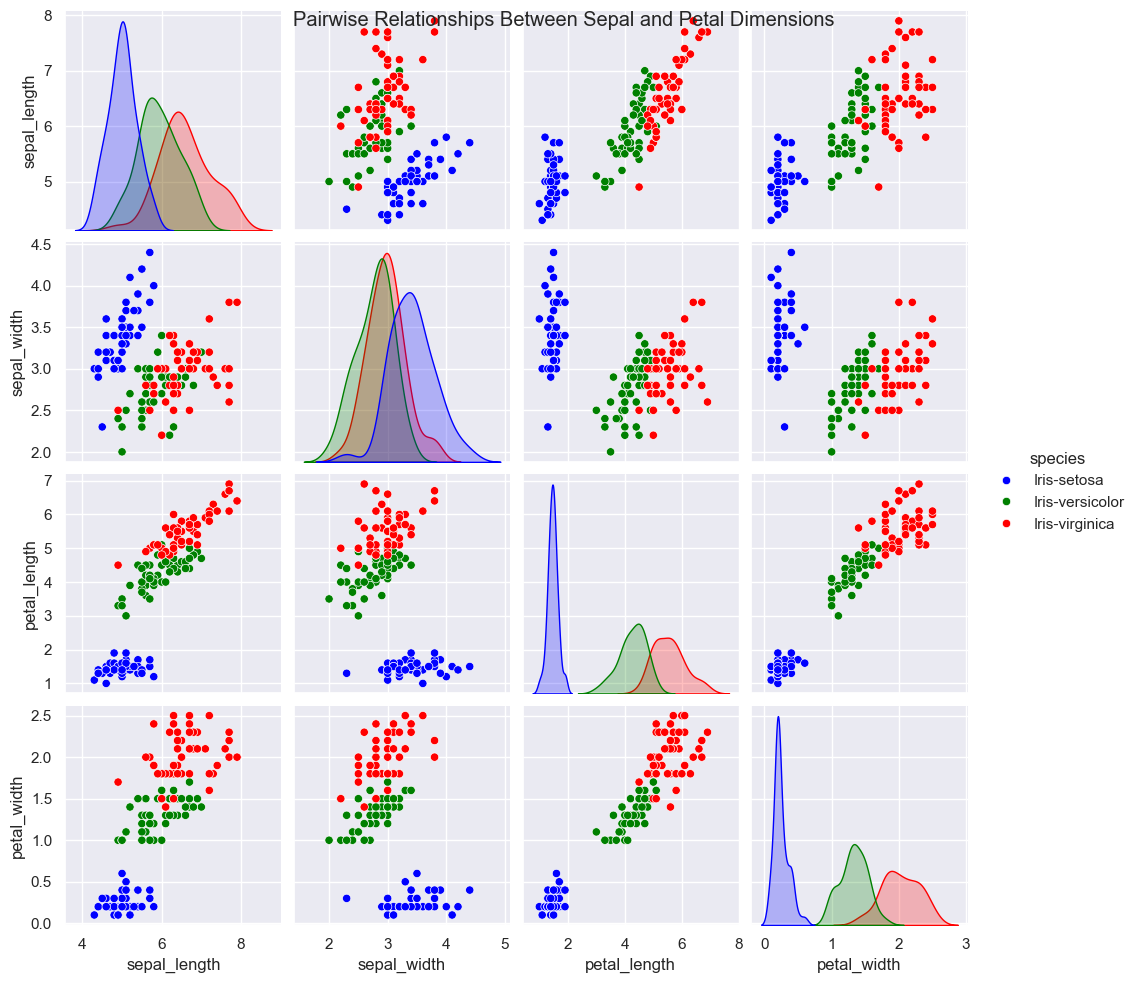

In [48]:
# generate pairplot
sns.pairplot(df_iris, vars=["sepal_length", "sepal_width", "petal_length", "petal_width"], hue="species", palette=custom_palette )
plt.suptitle("Pairwise Relationships Between Sepal and Petal Dimensions")
plt.show()


### How the different variables are related to each other.

We observe that the data is relatively normally distributed, and we cannot determine the difference in sepal width without performing some kind of hypothesis test to assess whether we can reject or fail to reject the null hypothesis that they are the same size. Furthermore, we see that Versicolor (green) and Virginica (red) seem to follow the same pattern in almost all plots, whereas Iris Setosa (blue) does not appear to follow the same pattern. Additionally, we observe that between sepal length and sepal width, there seems to be a linear relationship for all species, including Iris Setosa. This is the only linear relationship observed for Iris Setosa.

## Birdwatching

### What is the monthly distribution of the top 3 most prevelant species

In [51]:

df_art['Antal'] = pd.to_numeric(df_art['Antal'], errors='coerce')
# group by artnamn and sum the antal column
species_sum = df_art.groupby('Artnamn')['Antal'].sum().reset_index()

# Sort bysum 
species_sum_sorted = species_sum.sort_values(by='Antal', ascending=False).head(3)

print(species_sum_sorted)




       Artnamn    Antal
42   Grönsiska  20211.0
120    Sothöna   8308.0
29     Gräsand   7167.0


### What is the monthly distribution of the top 3 most prevelant species

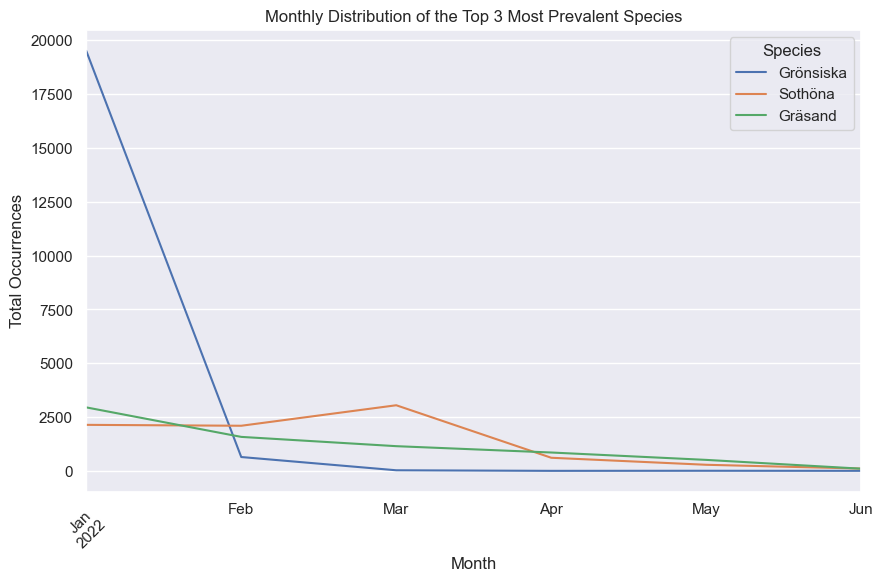

In [53]:
# group by species and month
df_art['Month'] = pd.to_datetime(df_art['Slutdatum'], format="%Y-%m-%d").dt.to_period('M')

# Group by artnamn month and antal
monthly_counts = df_art.groupby(['Artnamn', 'Month'])['Antal'].sum().unstack(fill_value=0)

# sort top 3 artnamn
top_3_species = monthly_counts.sum(axis=1).nlargest(3).index
monthly_counts_top_3 = monthly_counts.loc[top_3_species]

# plot
monthly_counts_top_3.T.plot(kind='line', figsize=(10, 6))

# Set plot labels and title
plt.title('Monthly Distribution of the Top 3 Most Prevalent Species')
plt.xlabel('Month')
plt.ylabel('Total Occurrences')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Species')
plt.show()

### What are the rarest species?

In [55]:
# sort by antal in ascending order
rarest_species = species_sum.sort_values(by='Antal').head(29)

# display the rarest species
print(rarest_species)

                       Artnamn  Antal
90                Ob. korsnäbb    0.0
25                   Fjällvråk    1.0
70                   Lappsparv    1.0
164                   Varfågel    1.0
28                     Gravand    1.0
26                    Forsärla    1.0
154                   Tornfalk    1.0
123                 Spillkråka    1.0
159                  Trädlärka    1.0
17                       Ejder    1.0
93   Ormvråk, underarten buteo    1.0
97                   Rosenfink    1.0
130                    Storlom    1.0
1                       Bivråk    1.0
98                   Röd glada    1.0
135                 Strömstare    1.0
99                     Rödbena    1.0
11              Bändelkorsnäbb    1.0
169                Ägretthäger    1.0
167             Vinterhämpling    1.0
126                   Stenfalk    2.0
71                 Ljungpipare    2.0
72                    Lärkfalk    2.0
81             Nordlig gulärla    2.0
22                   Fiskgjuse    2.0
82          

There was quite alot of rare birds and how you define rarebirds is a bit subjective. I choose all birds that were spotted 1 and 2 times, however you could argue that a bird spotted 3 times is rare, however, the list would be to long and you could then argue that 4 is also rare in that case and so on.

## My Own Questions

- What does the distribution of the number of observations over time look like?
- What does the hourly distribution look like?
- What does the distribution of red-listed species look like?


### What does the distribution of the number of observations over time look like?

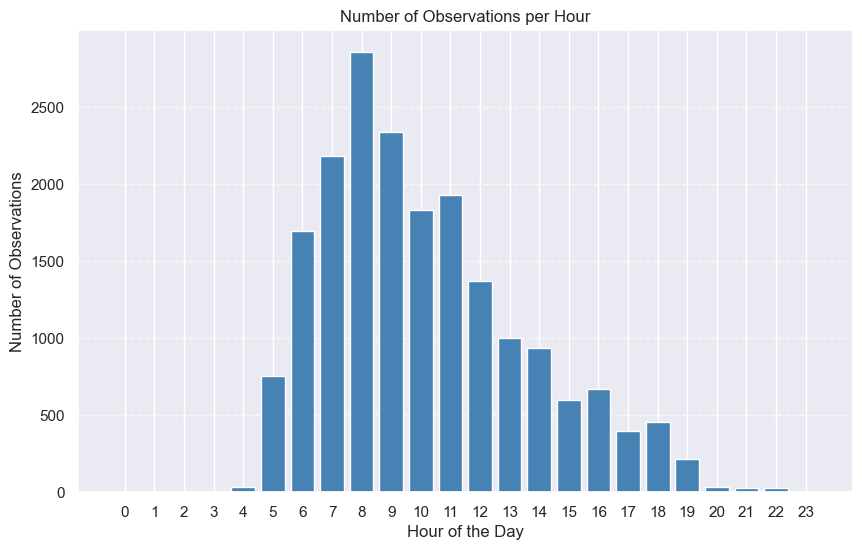

In [57]:
# so that starttid is treated as a string and extract the hour
df_art['Starttid'] = df_art['Starttid'].astype(str)
df_art['Hour'] = df_art['Starttid'].str[:2] 
df_art['Hour'] = pd.to_numeric(df_art['Hour'], errors='coerce')  

# count observations for each hour
hourly_counts = df_art['Hour'].value_counts().sort_index()

# fill in missing hours with 0 counts
all_hours = pd.Series(range(24), name='Hour')
hourly_counts = all_hours.to_frame().set_index('Hour').join(hourly_counts.rename('Count'), how='left').fillna(0)

# plot
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts['Count'], color='steelblue')
plt.title("Number of Observations per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Observations")
plt.xticks(range(24))  # Show all hours
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This plot shows us that most of the birds were observered from 6-11. The problem with this information is that it doesn't neccessciraily tell us that you will see the most amount of birds at these times or if it is just these hours the birdwatchers happened to be active. We will continue to analyse if the hours the obersvers choose to birdwatch is equally distributed or if there is indeed a certain bias.

### What does the hourly distribution look like with the observers? 

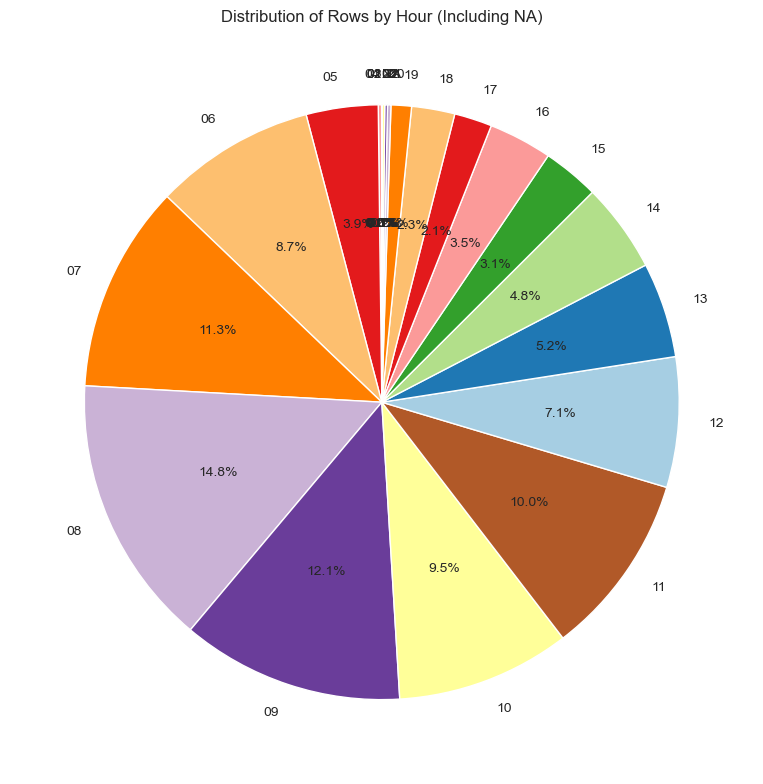

In [59]:
# extract hour from starttid and include NA as a category
df_art['Hour'] = df_art['Starttid'].str[:2].replace('nan', 'NA')

# count rows for each hour
hour_counts = df_art['Hour'].value_counts().reindex(
    [f"{i:02}" for i in range(24)] + ['NA'], fill_value=0
)

# pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    hour_counts,
    labels=hour_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 10}
)
plt.title("Distribution of Rows by Hour (Including NA)")
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

Here we can see that the distribution across the hours is not even. Having a more even distribution of data across hours is crucial for ensuring reliable and unbiased conclusions. The current dataset displays an uneven distribution of observations over the hours of the day, with certain time periods being underrepresented and some being overrespresented. This imbalance can significantly affect the accuracy of analyses and interpretations, particularly for species with specific behavioral patterns.

### What does the distribution of red-listed species look like?

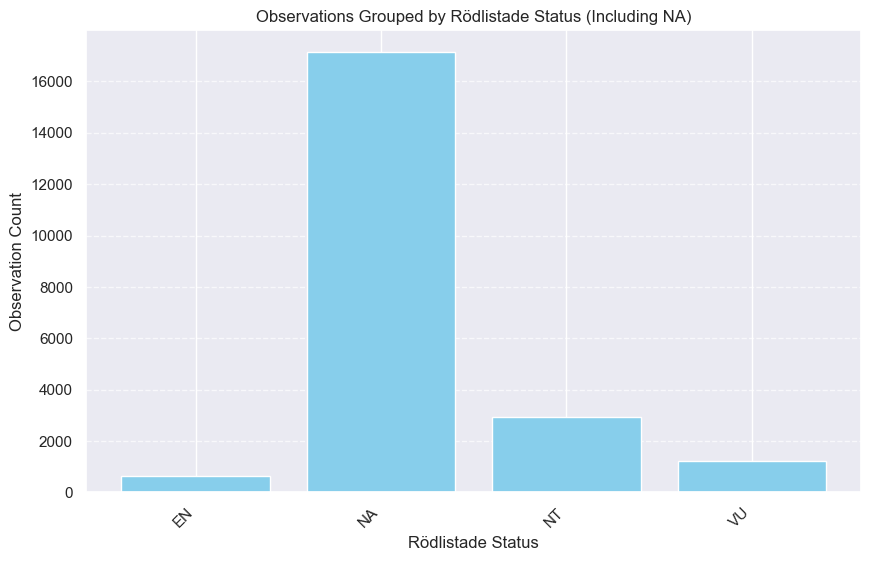

In [61]:
df_art['Rödlistade'] = df_art['Rödlistade'].fillna('NA')

# Group by rödlistade and count the number of observations
grouped = df_art.groupby('Rödlistade').size().reset_index(name='Observation Count')

# plot
plt.figure(figsize=(10, 6))
plt.bar(grouped['Rödlistade'], grouped['Observation Count'], color='skyblue')

plt.title("Observations Grouped by Rödlistade Status (Including NA)")
plt.xlabel("Rödlistade Status")
plt.ylabel("Observation Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

For caliarity we will explicity define what each categoery means and rank them. Firstly we have NA which I define as NE or NA meaning not evaluated which is the lowest typ of the redlisting. Then we have NT which is Near Threatened. Thirdly we have VU which is VUlnerable which is the next level of red listning. Lastly we have  EN which is Endagared which is the next level of redlistning. 

NA/(NE) -> NT -> VU -> EN

Looking at the plot and using intuition it makes sense that most of the observations are NA, then NT, thrildy VU and with the lowest EN which follows the hierachy of the endagrdment scale.

The problem with this is that i do not know for certain that NA in this case is Not Avaliable or Not accesed, it would maybe be good for the data collectors to be more clear about this. It also could be not avaliable beacuse the birdcollectors left that box unasnwered becaus ethat certain species is indeed not endangered.



## Predicting Strokes

Here I will be answering these three questions:

- What does the proportion of men and women being married or not look like in relation to having had a stroke or not?
- How does the distribution looks between age and married vs non married?
- Does living in an urban or rural environment have a relationship with having a stroke or not?

# What does the proportion of men and women being married or not look like in relation to having had a stroke or not?

  gender ever_married  stroke  count  proportion
4   Male           No       0    755    0.989515
5   Male           No       1      8    0.010485
6   Male          Yes       0   1252    0.926036
7   Male          Yes       1    100    0.073964
   gender ever_married  stroke  count  proportion
0  Female           No       0    972    0.978852
1  Female           No       1     21    0.021148
2  Female          Yes       0   1881    0.940030
3  Female          Yes       1    120    0.059970


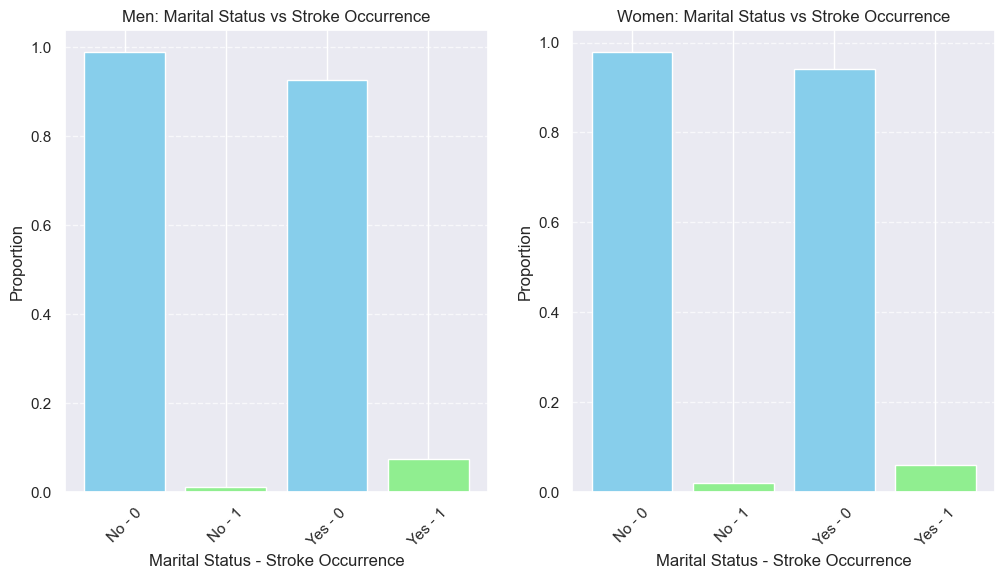

In [64]:
# group by gender, ever_married, and stroke to count occurrences
grouped = df_stroke.groupby(['gender', 'ever_married', 'stroke']).size().reset_index(name='count')

# normalize counts within each gender group to get porportion
grouped['proportion'] = grouped.groupby(['gender', 'ever_married'])['count'].transform(lambda x: x / x.sum())


men_data = grouped[grouped['gender'] == 'Male']
women_data = grouped[grouped['gender'] == 'Female']

# plot for men
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(men_data['ever_married'] + ' - ' + men_data['stroke'].astype(str), men_data['proportion'], color=['skyblue', 'lightgreen'])
plt.title('Men: Marital Status vs Stroke Occurrence')
plt.xlabel('Marital Status - Stroke Occurrence')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plot for women
plt.subplot(1, 2, 2)
plt.bar(women_data['ever_married'] + ' - ' + women_data['stroke'].astype(str), women_data['proportion'], color=['skyblue', 'lightgreen'])
plt.title('Women: Marital Status vs Stroke Occurrence')
plt.xlabel('Marital Status - Stroke Occurrence')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
print(men_data)
print(women_data)
plt.show()

We observe that among men, the proportion of individuals who have had a stroke is higher in the married group compared to the non-married group: 0.07 for married men versus 0.01 for non-married men. A similar trend is evident for women, although the difference in proportions is smaller. Among married women who have not had a stroke, the proportion is 0.02, while it is 0.06 for married women who have had a stroke.

This suggests there may be a correlation between being married and having a stroke. However, I emphasize the term correlation because it would be intellectually lazy to infer causation from these observations alone. For example, it is possible that married participants are, on average, older, which could explain the higher proportion of strokes in this group compared to their non-married counterparts. Further analysis would be required to draw deeper and more conclusive insights.

# How does the distribution looks between age and married vs non married?


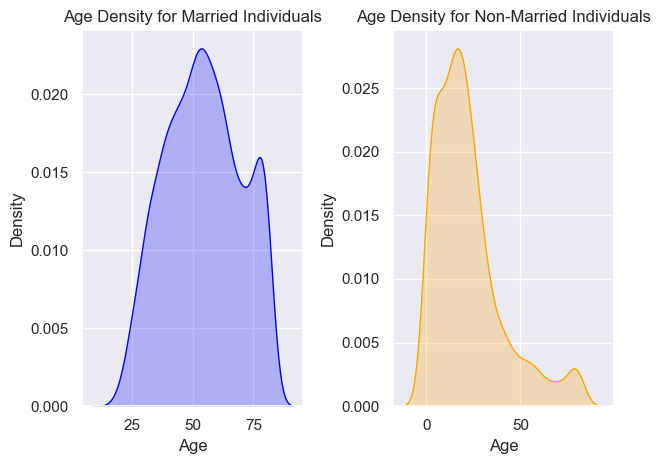

In [66]:
# Married
plt.subplot(1, 2, 1)
sns.kdeplot(df_stroke[df_stroke["ever_married"] == "Yes"]["age"], fill=True, color="blue", label="Married")
plt.title("Age Density for Married Individuals")
plt.xlabel("Age")
plt.ylabel("Density")

# Non-married
plt.subplot(1, 2, 2)
sns.kdeplot(df_stroke[df_stroke["ever_married"] == "No"]["age"], fill=True, color="orange", label="Non-married")
plt.title("Age Density for Non-Married Individuals")
plt.xlabel("Age")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

Here we can see the distribution among age between married and non-married individuals. If we connect this to the previous questions we could argue that the reasons why people that are married seem to have a bigger porportion of people that had stokes could be due to people being married are significantly older as seens by the density plot, compared to indivudals not being married are younger and could be the reason why the porportion of people that are not married and not hade a stoke is less.

# Does living in an urban or rural environment have a relationship with having a stroke or not?

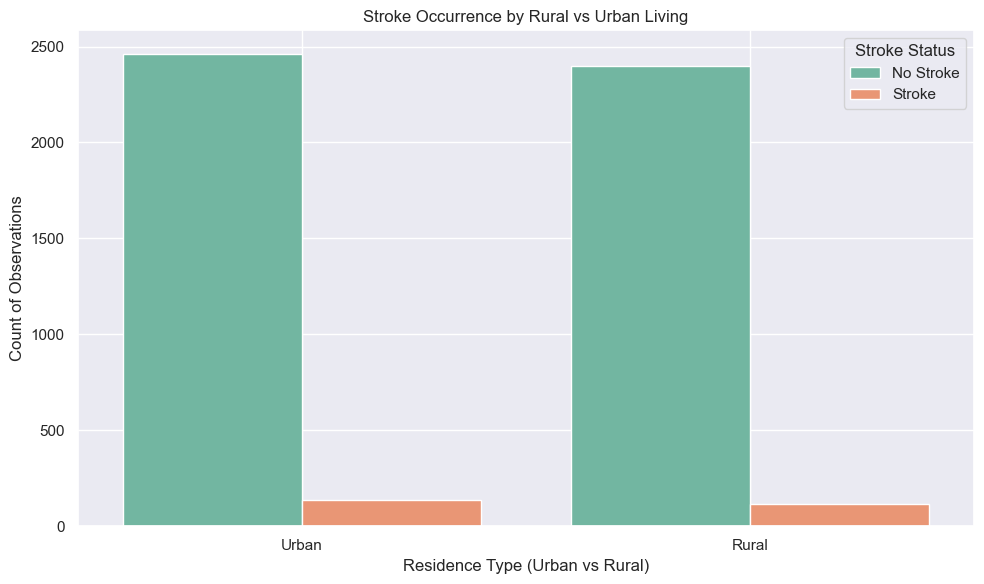

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_stroke, x='Residence_type', hue='stroke', palette='Set2')

plt.title('Stroke Occurrence by Rural vs Urban Living')
plt.xlabel('Residence Type (Urban vs Rural)')
plt.ylabel('Count of Observations')
plt.xticks(rotation=0)
plt.legend(title='Stroke Status', labels=['No Stroke', 'Stroke'])
plt.grid(True)
plt.tight_layout()
plt.show()

It seems that living in a urban or rural doesnt really affect the porportion of having a stroke or not. This is interesting since you might imagine living in a urban area people are more stressed etc which might lead to a bigger chance of having a stroke however a deeper analysis is required to understand these trends. What this plot tells me about the data for just urban vs rural is that it is quite amount of individuals living in rural areas vs urban areas 50/50 which i like. This minimizes the chance for randoms deviations or a certain bias.

## Cleaning data



You will find that some numbers are represented as string, where k=1e3, M=1e6 and B=1e9. You also see that we have some missing values. To clean the dataset we will deal with missing values by replcing it with 0 and convert all the relevant cells to numbers ("numbers" in a string with k, M and B). 

I will create a function that first handles the probles with the string that has k,m and B in it. The function will check the string if it ends with k,M or B, remove the letter and turn it to a numeric which we can then multiply by the corresponding number mention above. I will fill empty cells with the next cell's value using forward fill (ffill) (if there is one). Lastly I convert all cells with Nan to 0.0. This is done so that all cells are numeric, which can make it easier for future calculations and so on.

I then present a table with the iso-3 like in the homework page.


In [125]:
import pandas as pd
import numpy as np

def convert_to_numeric(value):
    if isinstance(value, str):
        multipliers = {'k': 1e3, 'M': 1e6, 'B': 1e9}
        try:
            return float(value[:-1]) * multipliers.get(value[-1], 1)
        except ValueError:
            return np.nan  
    return value 


for col in df_phone.columns[1:]:
    df_phone[col] = df_phone[col].apply(convert_to_numeric)


df_phone.update(df_phone[df_phone.columns[1:]].apply(pd.to_numeric, errors='coerce'))  
df_phone[df_phone.columns[1:]] = df_phone[df_phone.columns[1:]].ffill(axis=1)  

df_phone.head()

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132000.0,132000.0,135000.0,139000.0,140000.0,141000.0,141000.0,141000.0,141000.0,141000.0
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10200000.0,13800000.0,15300000.0,16800000.0,18400000.0,19700000.0,21600000.0,23900000.0,22000000.0,22600000.0
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9400000.0,12100000.0,12800000.0,13300000.0,14100000.0,13900000.0,13000000.0,13300000.0,13300000.0,14800000.0
3,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2690000.0,3100000.0,3500000.0,3690000.0,3360000.0,3400000.0,3370000.0,3630000.0,2710000.0,2630000.0
4,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65500.0,65000.0,63900.0,63900.0,66200.0,71300.0,76100.0,80300.0,82600.0,87900.0


In [111]:
df_phone.columns = df_phone.columns.astype(str)
df_phone_sorted = df_phone.sort_values(by='2015', ascending=False)
cleaned_sample = df_phone_sorted[['iso-3', '2015', '2016', '2017', '2018', '2019']]
cleaned_sample.head()


,iso-3,2015,2016,2017,2018,2019
35,CHN,1.290000e+09,1.360000e+09,1.470000e+09,1.650000e+09,1.730000e+09
87,IND,1.000000e+09,1.130000e+09,1.170000e+09,1.180000e+09,1.150000e+09
200,USA,3.820000e+08,3.960000e+08,4.000000e+08,4.220000e+08,4.220000e+08
86,IDN,3.390000e+08,3.860000e+08,4.350000e+08,3.190000e+08,3.450000e+08
26,BRA,2.580000e+08,2.440000e+08,2.180000e+08,2.070000e+08,2.070000e+08
